In [80]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from sklearn.metrics import confusion_matrix 
from keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [48]:
np.random.seed(0)

In [49]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [56]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000, 10)
(10000, 28, 28) (10000, 10)


visualizing

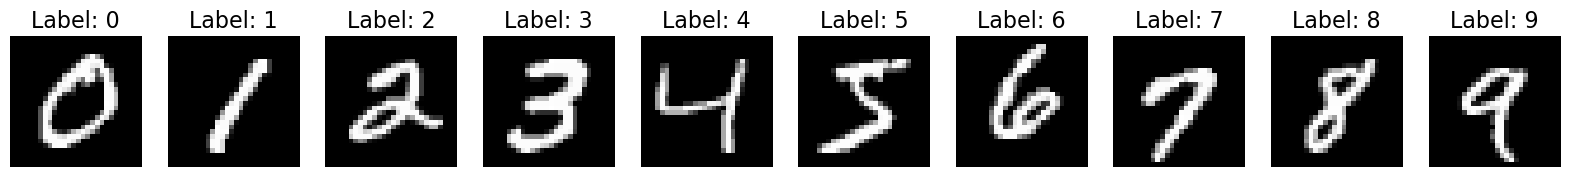

In [51]:
classes=10
f,ax=plt.subplots(1,classes,figsize=(20,20))
for i in range(0,classes):
    s=x_train[y_train==i][0]
    ax[i].imshow(s,cmap='gray') #rgb data
    ax[i].set_title("Label: {}".format(i),fontsize=16)
    ax[i].axis('off')

Data Preparation

In [52]:
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [53]:
original_y_train = y_train.copy()

In [54]:
#vector for the numbers-hot encoding
y_train=keras.utils.to_categorical(y_train,classes)
y_test=keras.utils.to_categorical(y_test,classes)
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Preparation

In [58]:
#normalize data
x_train=x_train/255.0
x_test=x_test/255.0

In [62]:
#reshape data
x_train=x_train.reshape(x_train.shape[0],-1)
x_testn=x_test.reshape(x_test.shape[0],-1)
print(x_test.shape)
print(x_train.shape)

(10000, 28, 28)
(60000, 784)


Building model

In [63]:
model=Sequential()

In [67]:
model.add(Dense(units=128,input_shape=(784,),activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 156,702 (612.12 KB)

 Trainable params: 156,702 (612.12 KB)

 Non-trainable params: 0 (0.00 B)

Training

In [68]:
batch_size=512
epochs=10
model.fit(x=x_train,y=y_train,batch_size=batch_size,epochs=epochs)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1919 - loss: 2.1235
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5178 - loss: 1.0298
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7544 - loss: 0.6315
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9158 - loss: 0.3341
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9505 - loss: 0.2084
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9621 - loss: 0.1604
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9684 - loss: 0.1312
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9743 - loss: 0.1033
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9767 - loss: 0.0940
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9811 - loss: 0.0758


Evaluate

In [71]:
x_test_flat = x_test.reshape(-1, 28 * 28)  # Reshape to (num_samples, 784)
test_loss,test_acc=model.evaluate(x_test_flat,y_test)
print("Test Loss: {},Test Accuracy: {}".format(test_loss,test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9685 - loss: 0.1405
Test Loss: 0.12132049351930618,Test Accuracy: 0.9718999862670898


In [73]:
x_test_flat = x_test.reshape(-1, 28 * 28)  # Reshape to (num_samples, 784) 
y_pred = model.predict(x_test_flat)
y_pred_c = np.argmax(y_pred, axis=1)
print(y_pred_c)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
[7 2 1 ... 4 5 6]


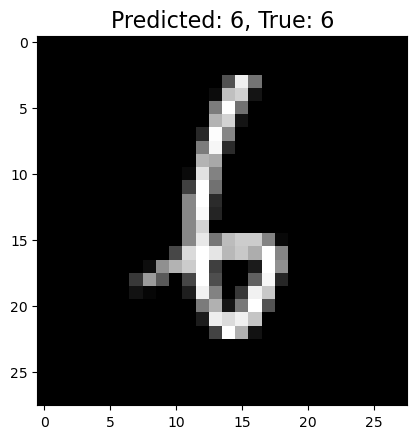

In [74]:
random_idx=np.random.choice(len(x_test))
x_sample=x_test[random_idx]
y_true=np.argmax(y_test,axis=1)
y_sample_true=y_true[random_idx]
y_sample_pred_c=y_pred_c[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_c,y_sample_true),fontsize=16)
plt.imshow(x_sample.reshape(28,28),cmap='gray')

Confudion matrix

Text(0.5, 1.0, 'Confusion Matrix')

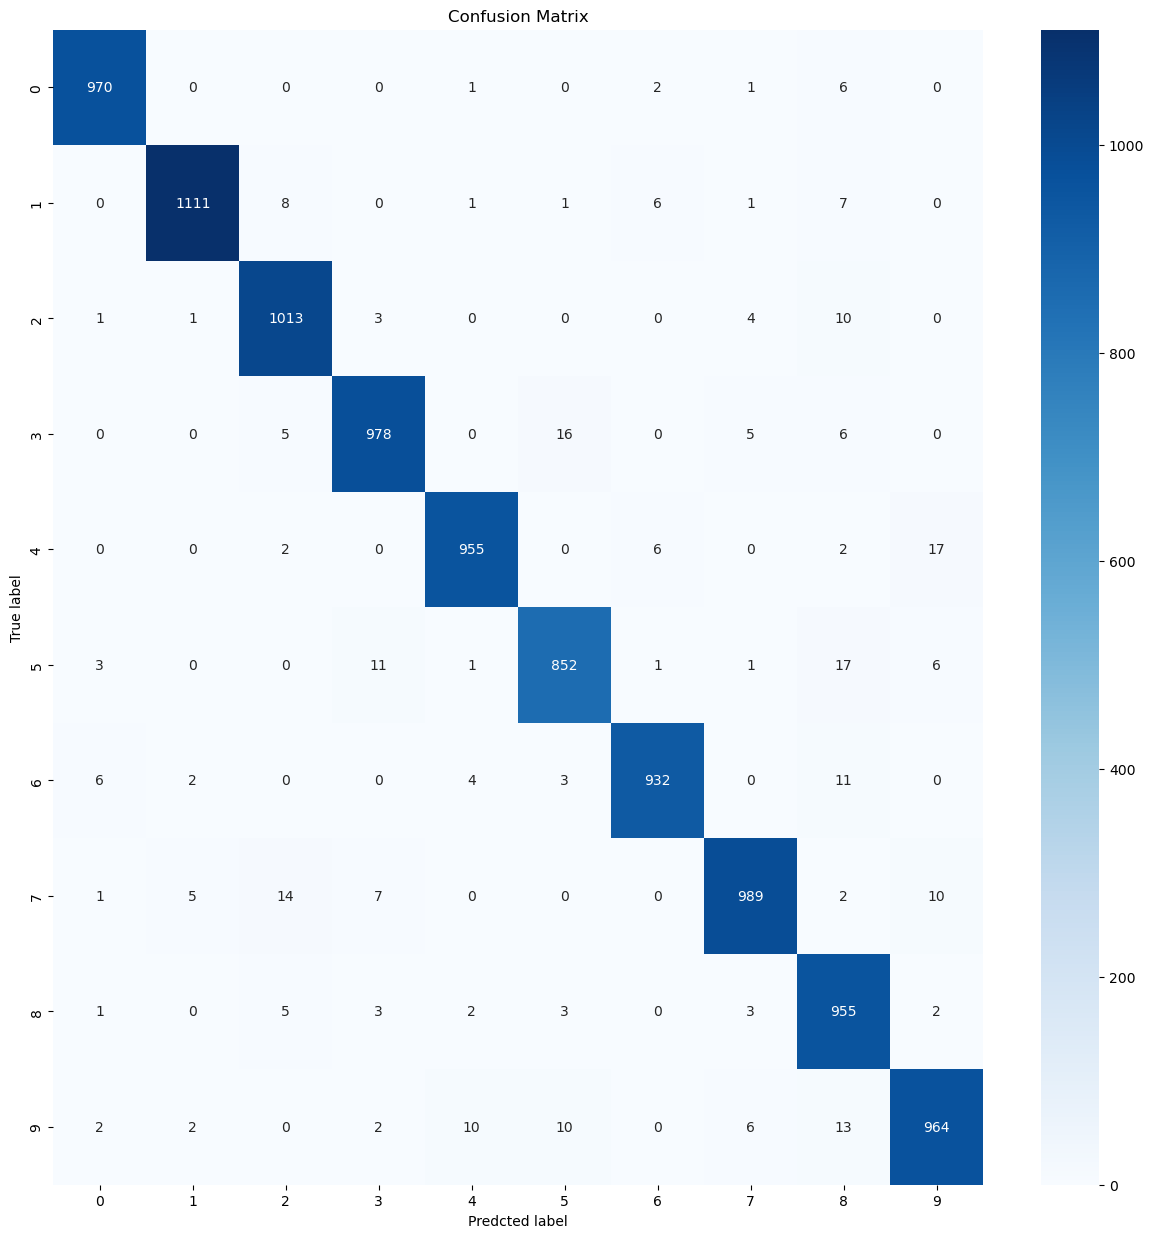

In [82]:
y_test_labels = np.argmax(y_test, axis=1)
y_pred_c = np.argmax(y_pred, axis=1)  # Use this if y_pred is in one-hot format
# If you converted y_test to class labels
confusion_mtx = confusion_matrix(y_test_labels, y_pred_c)
fiq,ax=plt.subplots(figsize=(15,15))
ax=sns.heatmap(confusion_mtx,annot=True,fmt='d',ax=ax,cmap="Blues")
ax.set_xlabel('Predcted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')